In [3]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from matplotlib import colors
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [4]:
data = pd.read_csv('dataset/Clustered_GM.csv')

# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Explanatory Data Analysis</p>

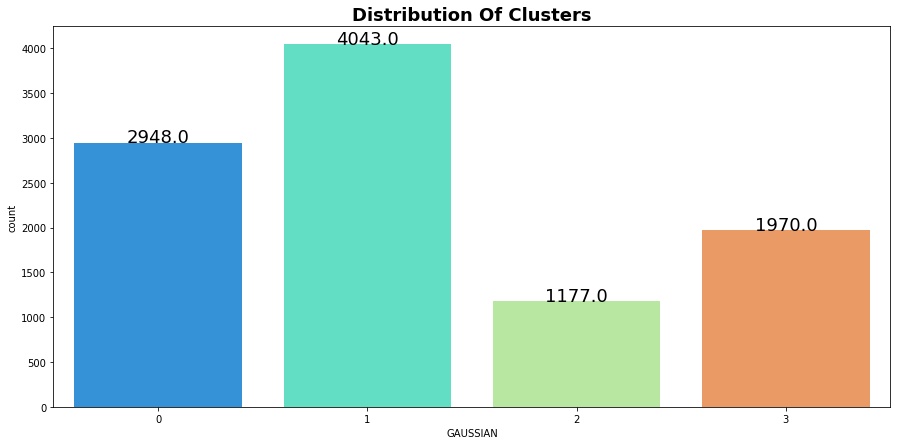

In [5]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(x=data["GAUSSIAN"], palette='rainbow')
ax.set_title("Distribution Of Clusters",fontsize = 18, fontweight='bold')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)

In [6]:
# Define the mapping for the values
mapping = {0: 'cluster 0', 1: 'cluster 1', 2: 'cluster 2', 3: 'cluster 3'}

# Apply the mapping to the 'Clusters' column
data['GAUSSIAN'] = data['GAUSSIAN'].map(mapping)

In [7]:
# Define the order of the clusters
cluster_order = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

# Set the order of the clusters in the DataFrame
data['GAUSSIAN'] = pd.Categorical(data['GAUSSIAN'], categories=cluster_order, ordered=True)

In [8]:
# Get the unique clusters in the dataset
# Modify this list if you have different cluster values
clusters = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

### 6 Month Outcome

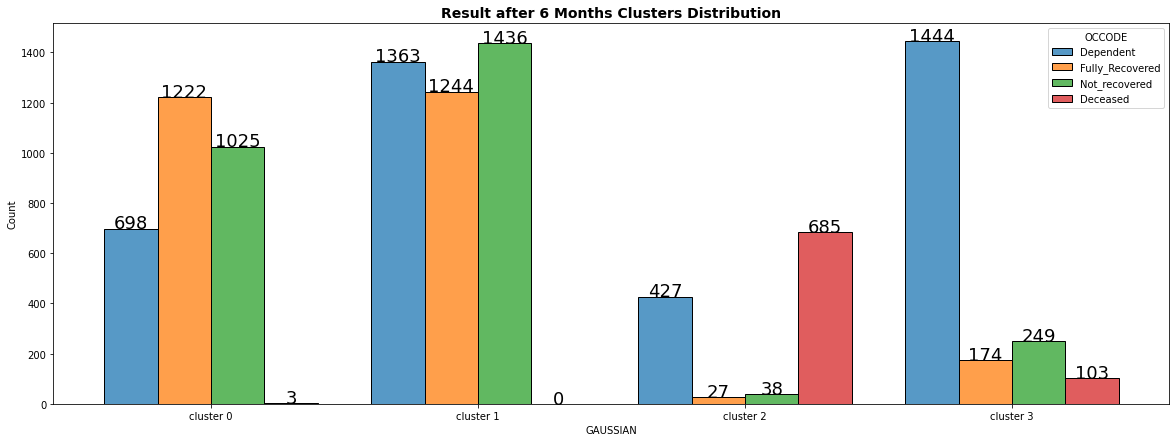

In [9]:
countplt, ax = plt.subplots(figsize = (20,7))

ax = sns.histplot(data=data, hue="OCCODE", x="GAUSSIAN", multiple="dodge", shrink=.8, palette='tab10')
ax.set_title('Result after 6 Months Clusters Distribution',fontsize = 14, fontweight='bold' )
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),
             horizontalalignment='center', fontsize = 18)

##### Descriptive statistics from clustering results for Gaussian Mixture using category percentage dominance

In [10]:
# Get the unique age categories in the dataset
outcome_categories = data['OCCODE'].unique()

# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for outcome_category in outcome_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['OCCODE'] == outcome_category])

        # Count the number of instances of the current age category in the current cluster
        count_in_cluster = len(data[(data['OCCODE'] == outcome_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{outcome_category}' in cluster {cluster} compared to all '{outcome_category}' in the dataset: {percentage:.2f}%")


Cluster cluster 0:
The percentage of 'Dependent' in cluster cluster 0 compared to all 'Dependent' in the dataset: 17.75%
The percentage of 'Fully_Recovered' in cluster cluster 0 compared to all 'Fully_Recovered' in the dataset: 45.82%
The percentage of 'Not_recovered' in cluster cluster 0 compared to all 'Not_recovered' in the dataset: 37.30%
The percentage of 'Deceased' in cluster cluster 0 compared to all 'Deceased' in the dataset: 0.38%
Cluster cluster 1:
The percentage of 'Dependent' in cluster cluster 1 compared to all 'Dependent' in the dataset: 34.66%
The percentage of 'Fully_Recovered' in cluster cluster 1 compared to all 'Fully_Recovered' in the dataset: 46.64%
The percentage of 'Not_recovered' in cluster cluster 1 compared to all 'Not_recovered' in the dataset: 52.26%
The percentage of 'Deceased' in cluster cluster 1 compared to all 'Deceased' in the dataset: 0.00%
Cluster cluster 2:
The percentage of 'Dependent' in cluster cluster 2 compared to all 'Dependent' in the dataset

### AGE

In [11]:
#Convert numerical to categorical value using binning method ~OPTION ~2
#Youth=15 to 24, Adults=25 to 64 Seniors= 65 and above
data['AGE'] = pd.cut(data['AGE'], bins=[14,24,64,101], labels=['Youth','Adults','Seniors'])
data['AGE'] = data['AGE'].astype('object')

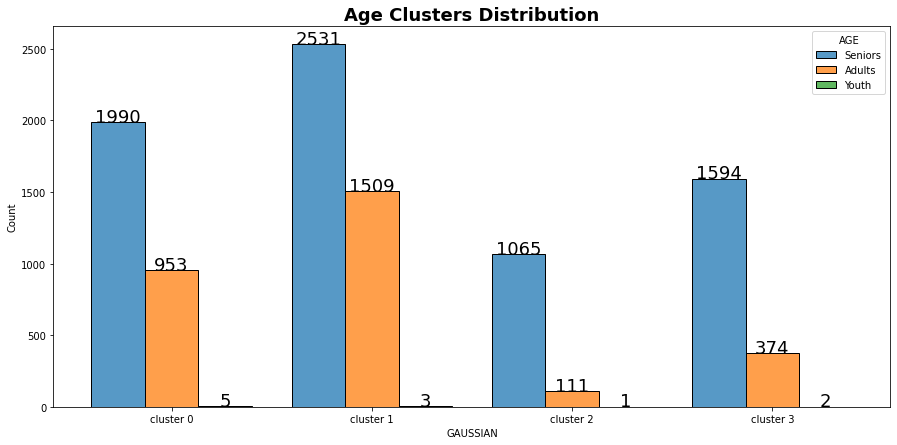

In [12]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data=data, x="GAUSSIAN", multiple="dodge", hue='AGE', shrink=.8)
ax.set_title('Age Clusters Distribution',fontsize = 18, fontweight='bold' )
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)

In [13]:
# Get the unique age categories in the dataset
age_categories = data['AGE'].unique()

# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for age_category in age_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['AGE'] == age_category])

        # Count the number of instances of the current age category in the current cluster
        count_in_cluster = len(data[(data['AGE'] == age_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{age_category}' in cluster {cluster} compared to all '{age_category}' in the dataset: {percentage:.2f}%")


Cluster cluster 0:
The percentage of 'Seniors' in cluster cluster 0 compared to all 'Seniors' in the dataset: 27.72%
The percentage of 'Adults' in cluster cluster 0 compared to all 'Adults' in the dataset: 32.34%
The percentage of 'Youth' in cluster cluster 0 compared to all 'Youth' in the dataset: 45.45%
Cluster cluster 1:
The percentage of 'Seniors' in cluster cluster 1 compared to all 'Seniors' in the dataset: 35.25%
The percentage of 'Adults' in cluster cluster 1 compared to all 'Adults' in the dataset: 51.20%
The percentage of 'Youth' in cluster cluster 1 compared to all 'Youth' in the dataset: 27.27%
Cluster cluster 2:
The percentage of 'Seniors' in cluster cluster 2 compared to all 'Seniors' in the dataset: 14.83%
The percentage of 'Adults' in cluster cluster 2 compared to all 'Adults' in the dataset: 3.77%
The percentage of 'Youth' in cluster cluster 2 compared to all 'Youth' in the dataset: 9.09%
Cluster cluster 3:
The percentage of 'Seniors' in cluster cluster 3 compared to a

### GENDER

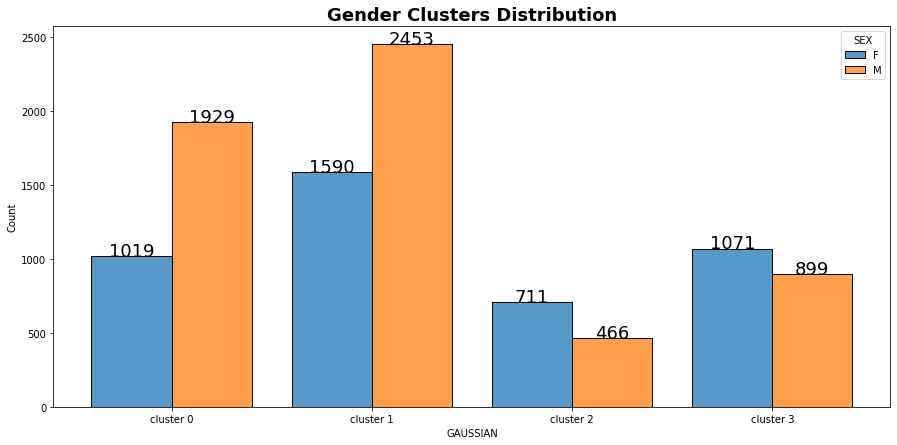

In [14]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data=data, x="GAUSSIAN", multiple="dodge", hue='SEX', shrink=.8)
ax.set_title('Gender Clusters Distribution',fontsize = 18, fontweight='bold' )
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)

In [15]:
# Get the unique age categories in the dataset
gender_categories = data['SEX'].unique()

# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for gender_category in gender_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['SEX'] == gender_category])

        # Count the number of instances of the current age category in the current cluster
        count_in_cluster = len(data[(data['SEX'] == gender_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{gender_category}' in cluster {cluster} compared to all '{gender_category}' in the dataset: {percentage:.2f}%")


Cluster cluster 0:
The percentage of 'F' in cluster cluster 0 compared to all 'F' in the dataset: 23.21%
The percentage of 'M' in cluster cluster 0 compared to all 'M' in the dataset: 33.57%
Cluster cluster 1:
The percentage of 'F' in cluster cluster 1 compared to all 'F' in the dataset: 36.21%
The percentage of 'M' in cluster cluster 1 compared to all 'M' in the dataset: 42.68%
Cluster cluster 2:
The percentage of 'F' in cluster cluster 2 compared to all 'F' in the dataset: 16.19%
The percentage of 'M' in cluster cluster 2 compared to all 'M' in the dataset: 8.11%
Cluster cluster 3:
The percentage of 'F' in cluster cluster 3 compared to all 'F' in the dataset: 24.39%
The percentage of 'M' in cluster cluster 3 compared to all 'M' in the dataset: 15.64%
Cluster cluster 4:
The percentage of 'F' in cluster cluster 4 compared to all 'F' in the dataset: 0.00%
The percentage of 'M' in cluster cluster 4 compared to all 'M' in the dataset: 0.00%


### STROKE Major Category

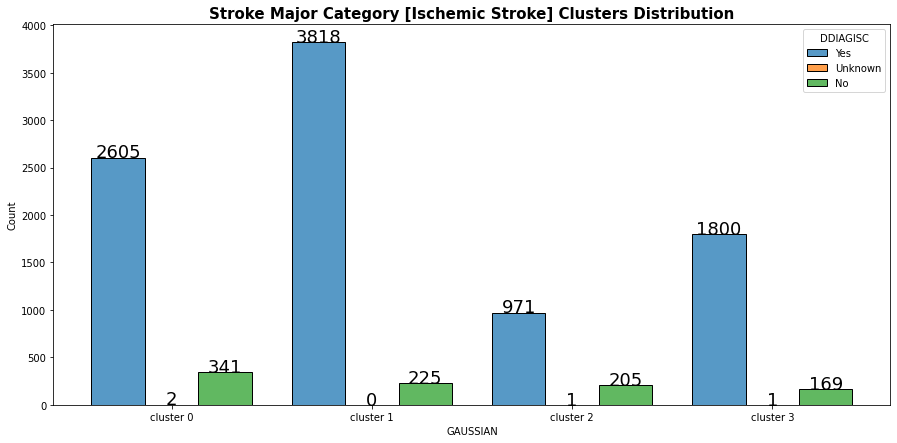

In [16]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data=data, x="GAUSSIAN", multiple="dodge", hue='DDIAGISC', shrink=.8)
ax.set_title('Stroke Major Category [Ischemic Stroke] Clusters Distribution',fontsize = 15, fontweight='bold' )
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)

In [17]:
# Get the unique age categories in the dataset
isc_categories = data['DDIAGISC'].unique()

# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for isc_category in isc_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['DDIAGISC'] == isc_category])

        # Count the number of instances of the current age category in the current cluster
        count_in_cluster = len(data[(data['DDIAGISC'] == isc_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{isc_category}' in cluster {cluster} compared to all '{isc_category}' in the dataset: {percentage:.2f}%")


Cluster cluster 0:
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 28.33%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 50.00%
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 36.28%
Cluster cluster 1:
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 41.53%
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 0.00%
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 23.94%
Cluster cluster 2:
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 10.56%
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 25.00%
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 21.81%
Cluster cluster 3:
The percentage of 'Yes' in cluster cluster 3 compared to all 'Yes' in the dataset: 19.58%
The per

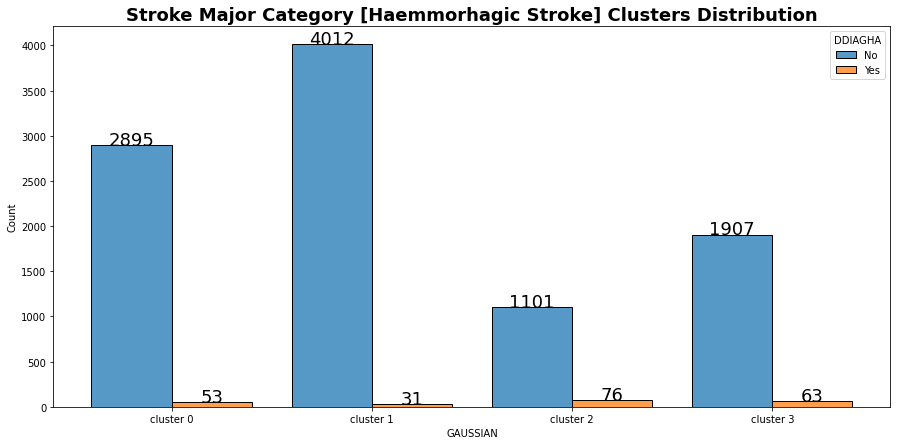

In [18]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data=data, x="GAUSSIAN", multiple="dodge", hue='DDIAGHA', shrink=.8)
ax.set_title('Stroke Major Category [Haemmorhagic Stroke] Clusters Distribution',fontsize = 18, fontweight='bold' )
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)
    


In [19]:
# Get the unique age categories in the dataset
ha_categories = data['DDIAGHA'].unique()

# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for ha_category in ha_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['DDIAGHA'] == ha_category])

        # Count the number of instances of the current age category in the current cluster
        count_in_cluster = len(data[(data['DDIAGHA'] == ha_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{ha_category}' in cluster {cluster} compared to all '{ha_category}' in the dataset: {percentage:.2f}%")


Cluster cluster 0:
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.20%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 23.77%
Cluster cluster 1:
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 40.46%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 13.90%
Cluster cluster 2:
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 11.10%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 34.08%
Cluster cluster 3:
The percentage of 'No' in cluster cluster 3 compared to all 'No' in the dataset: 19.23%
The percentage of 'Yes' in cluster cluster 3 compared to all 'Yes' in the dataset: 28.25%
Cluster cluster 4:
The percentage of 'No' in cluster cluster 4 compared to all 'No' in the dataset: 0.00%
The percentage of 'Yes' in cluster cluster 4 compared to all 'Yes' in the dataset: 0.00%


### STROKE SUBTYPES

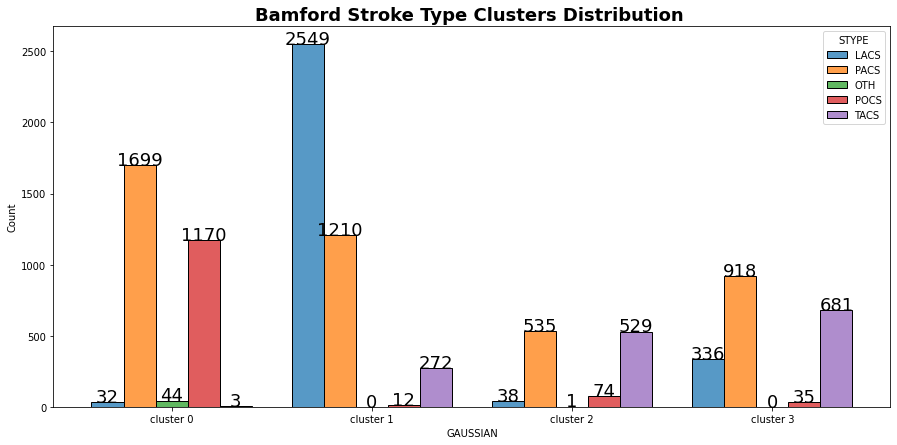

In [20]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.histplot(data=data, x="GAUSSIAN", multiple="dodge", hue='STYPE', shrink=.8)
ax.set_title('Bamford Stroke Type Clusters Distribution ',fontsize = 18, fontweight='bold' )
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)

In [21]:
# Get the unique age categories in the dataset
stype_categories = data['STYPE'].unique()

# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for stype_category in stype_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['STYPE'] == stype_category])
        
        # Count the number of instances of the current stype category in the current cluster
        count_in_cluster = len(data[(data['STYPE'] == stype_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{stype_category}' in cluster {cluster} compared to all '{stype_category}' in the dataset: {percentage:.2f}%")


Cluster cluster 0:
The percentage of 'LACS' in cluster cluster 0 compared to all 'LACS' in the dataset: 1.08%
The percentage of 'PACS' in cluster cluster 0 compared to all 'PACS' in the dataset: 38.95%
The percentage of 'OTH' in cluster cluster 0 compared to all 'OTH' in the dataset: 97.78%
The percentage of 'POCS' in cluster cluster 0 compared to all 'POCS' in the dataset: 90.63%
The percentage of 'TACS' in cluster cluster 0 compared to all 'TACS' in the dataset: 0.20%
Cluster cluster 1:
The percentage of 'LACS' in cluster cluster 1 compared to all 'LACS' in the dataset: 86.26%
The percentage of 'PACS' in cluster cluster 1 compared to all 'PACS' in the dataset: 27.74%
The percentage of 'OTH' in cluster cluster 1 compared to all 'OTH' in the dataset: 0.00%
The percentage of 'POCS' in cluster cluster 1 compared to all 'POCS' in the dataset: 0.93%
The percentage of 'TACS' in cluster cluster 1 compared to all 'TACS' in the dataset: 18.32%
Cluster cluster 2:
The percentage of 'LACS' in clu

### DRUGS ADMINISTERED

In [22]:
Medicines = ['DASP14','DOAC','DGORM','DMH14','RHEP24','RASP3','FAP','FOAC','DASPLT']
Medicines_ds = ['Aspirin given for 14 days or till death or discharge', 'Other anticoagulants', 'Given Glycerol or Matinol',
               'Medium dose heparin given for 14 days or till death/discharge', 'Heparin within 24 hours prior to randomisation',
               'Aspirin within 3 days prior to randomisation', 'On antiplatelet drugs', 'On anticoagulants', 'Discharged on long term aspirin']

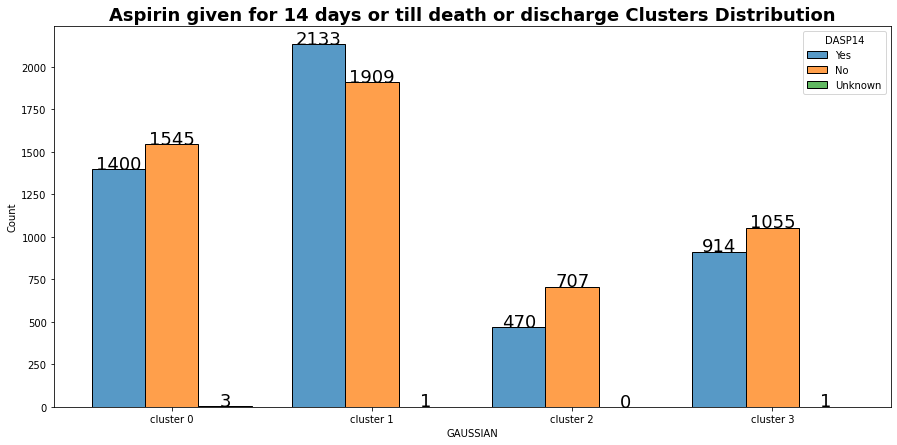

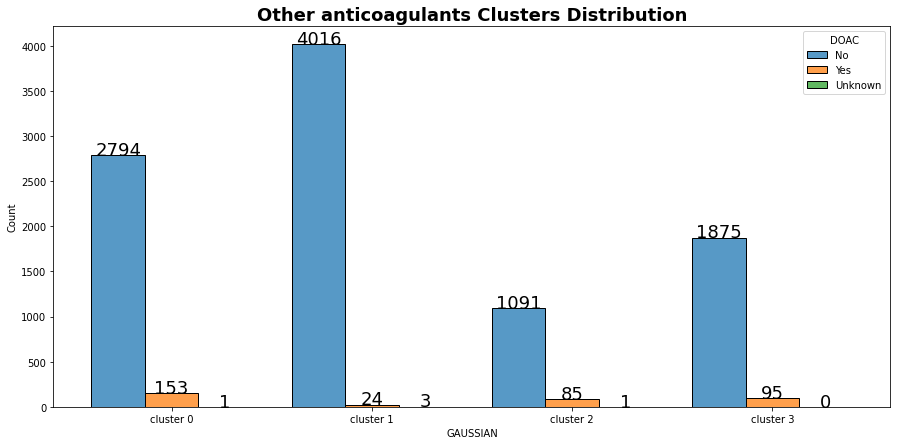

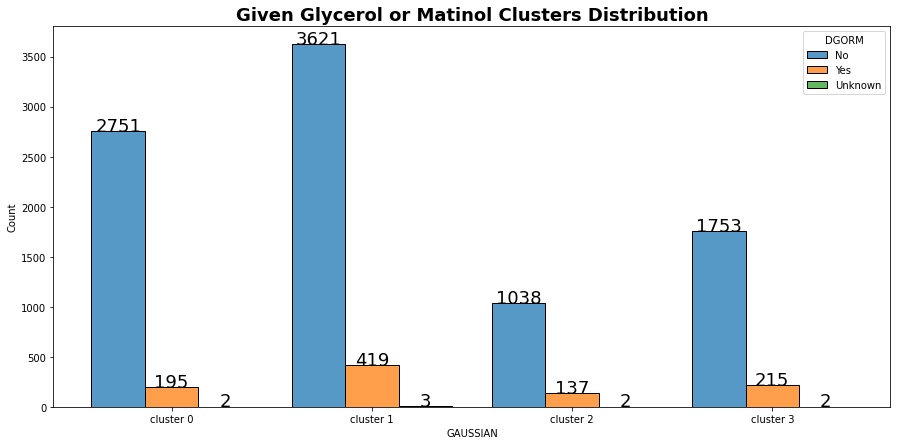

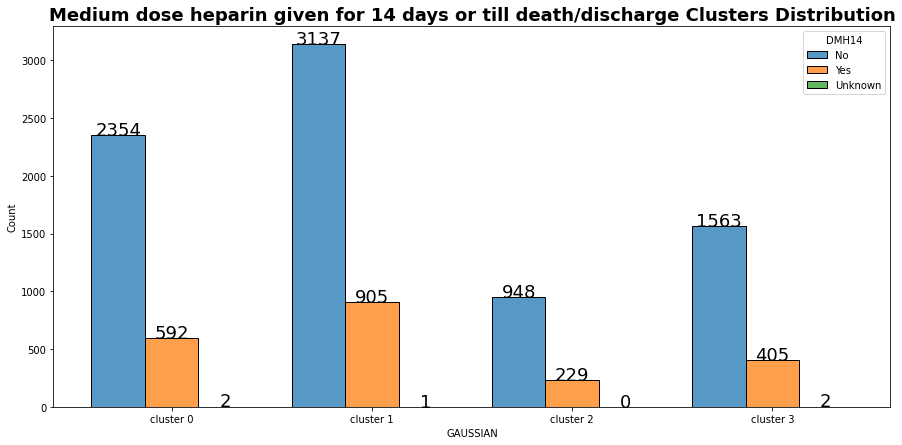

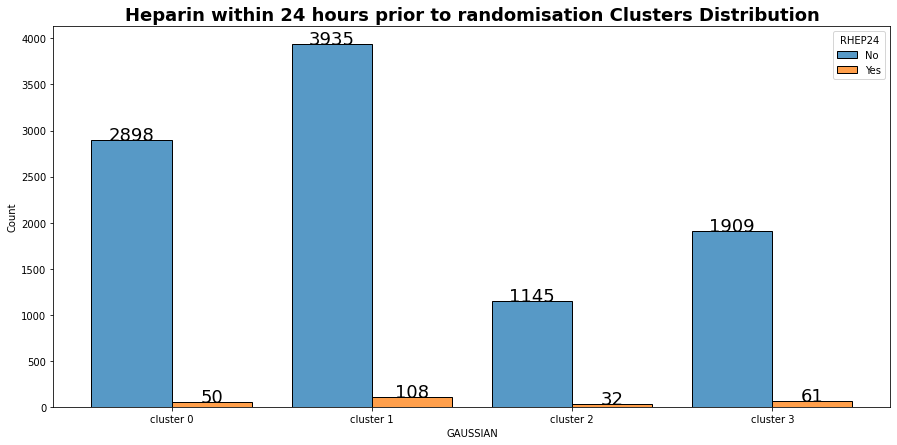

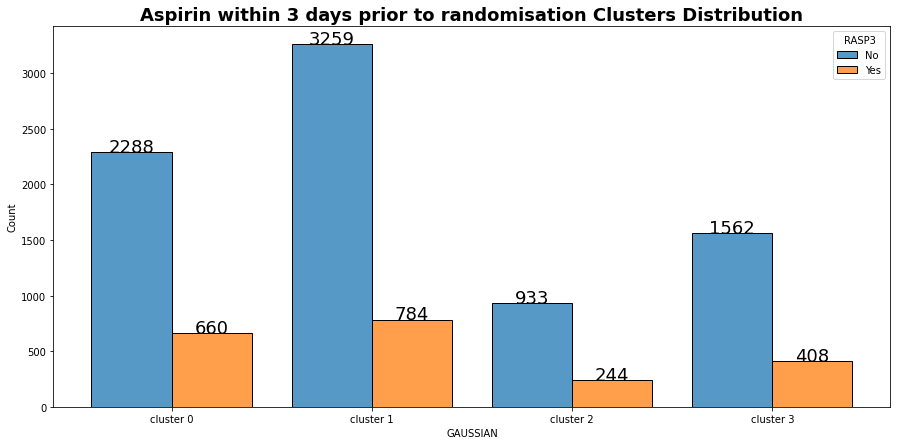

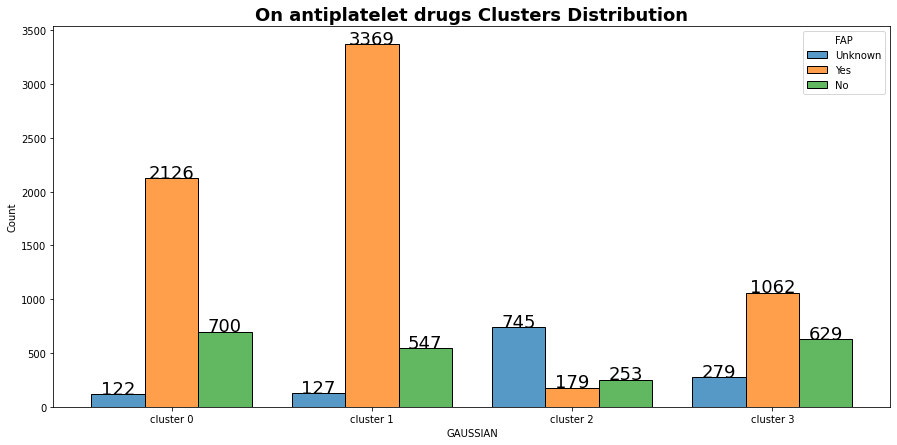

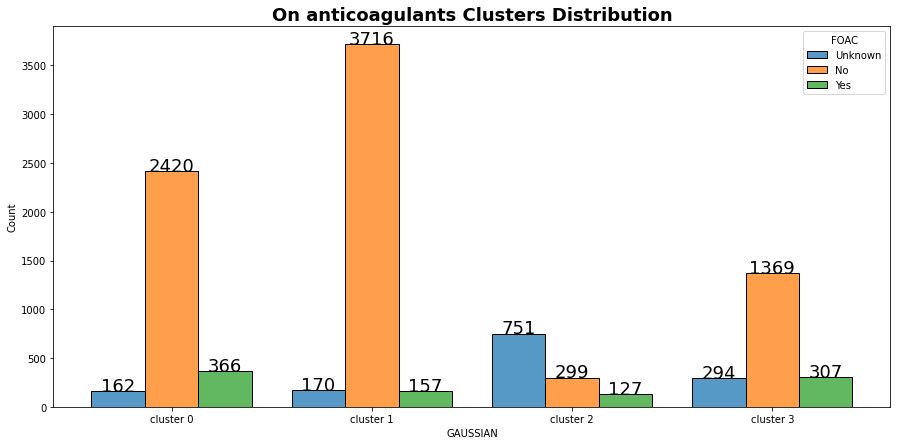

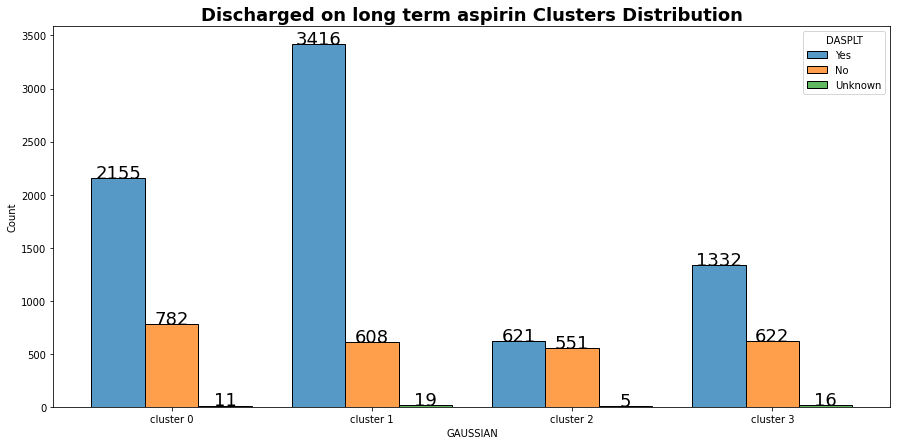

In [41]:
k = 0

for i in Medicines:
    countplt, ax = plt.subplots(figsize = (15,7))
    ax = sns.histplot(data=data, x="GAUSSIAN", multiple="dodge", hue=i, shrink=.8)
    ax.set_title(Medicines_ds[k] + ' Clusters Distribution',fontsize = 18, fontweight='bold' )
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)
    k=k+1

In [27]:
# Get the unique age categories in the dataset
column_categories = data['DASP14'].unique()
print (Medicines_ds[0])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['DASP14'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['DASP14'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


Aspirin given for 14 days or till death or discharge
Cluster cluster 0:
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 28.47%
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.62%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 60.00%
Cluster cluster 1:
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 43.38%
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 36.60%
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 20.00%
Cluster cluster 2:
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 9.56%
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 13.55%
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 0.00%
Cluster cluster 3:
The percentage of 'Yes' in cluster cluster 3 

In [28]:
# Get the unique age categories in the dataset
column_categories = data['DOAC'].unique()
print (Medicines_ds[1])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['DOAC'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['DOAC'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


Other anticoagulants
Cluster cluster 0:
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 28.58%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 42.86%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 20.00%
Cluster cluster 1:
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 41.08%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 6.72%
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 60.00%
Cluster cluster 2:
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 11.16%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 23.81%
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 20.00%
Cluster cluster 3:
The percentage of 'No' in cluster cluster 3 compared to all 'No' in the data

In [29]:
# Get the unique age categories in the dataset
column_categories = data['DGORM'].unique()
print (Medicines_ds[2])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['DGORM'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['DGORM'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


Given Glycerol or Matinol
Cluster cluster 0:
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 30.02%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 20.19%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 22.22%
Cluster cluster 1:
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 39.52%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 43.37%
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 33.33%
Cluster cluster 2:
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 11.33%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 14.18%
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 22.22%
Cluster cluster 3:
The percentage of 'No' in cluster cluster 3 compared to all 'No' in th

In [30]:
# Get the unique age categories in the dataset
column_categories = data['DMH14'].unique()
print (Medicines_ds[3])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['DMH14'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['DMH14'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


Medium dose heparin given for 14 days or till death/discharge
Cluster cluster 0:
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.42%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 27.78%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 40.00%
Cluster cluster 1:
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 39.20%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 42.47%
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 20.00%
Cluster cluster 2:
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 11.85%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 10.75%
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 0.00%
Cluster cluster 3:
The percentage of 'No' in cluster c

In [31]:
# Get the unique age categories in the dataset
column_categories = data['RHEP24'].unique()
print (Medicines_ds[4])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['RHEP24'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['RHEP24'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


Heparin within 24 hours prior to randomisation
Cluster cluster 0:
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.31%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 19.92%
Cluster cluster 1:
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 39.80%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 43.03%
Cluster cluster 2:
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 11.58%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 12.75%
Cluster cluster 3:
The percentage of 'No' in cluster cluster 3 compared to all 'No' in the dataset: 19.31%
The percentage of 'Yes' in cluster cluster 3 compared to all 'Yes' in the dataset: 24.30%
Cluster cluster 4:
The percentage of 'No' in cluster cluster 4 compared to all 'No' in the dataset: 0.00%
The percentage of 'Yes' in cluster cluster 4 compared to al

In [32]:
# Get the unique age categories in the dataset
column_categories = data['RASP3'].unique()
print (Medicines_ds[5])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['RASP3'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['RASP3'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


Aspirin within 3 days prior to randomisation
Cluster cluster 0:
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 28.45%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 31.49%
Cluster cluster 1:
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 40.52%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 37.40%
Cluster cluster 2:
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 11.60%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 11.64%
Cluster cluster 3:
The percentage of 'No' in cluster cluster 3 compared to all 'No' in the dataset: 19.42%
The percentage of 'Yes' in cluster cluster 3 compared to all 'Yes' in the dataset: 19.47%
Cluster cluster 4:
The percentage of 'No' in cluster cluster 4 compared to all 'No' in the dataset: 0.00%
The percentage of 'Yes' in cluster cluster 4 compared to all 

In [33]:
# Get the unique age categories in the dataset
column_categories = data['FAP'].unique()
print (Medicines_ds[6])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['FAP'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['FAP'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


On antiplatelet drugs
Cluster cluster 0:
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 9.58%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 31.56%
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 32.88%
Cluster cluster 1:
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 9.98%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 50.01%
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 25.69%
Cluster cluster 2:
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 58.52%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 2.66%
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 11.88%
Cluster cluster 3:
The percentage of 'Unknown' in cluster cluster 3 compared to all 'Unknown' in

In [34]:
# Get the unique age categories in the dataset
column_categories = data['FOAC'].unique()
print (Medicines_ds[7])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['FOAC'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['FOAC'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


On anticoagulants
Cluster cluster 0:
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 11.76%
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 31.01%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 38.24%
Cluster cluster 1:
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 12.35%
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 47.62%
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 16.41%
Cluster cluster 2:
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 54.54%
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 3.83%
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 13.27%
Cluster cluster 3:
The percentage of 'Unknown' in cluster cluster 3 compared to all 'Unknown' in t

In [35]:
# Get the unique age categories in the dataset
column_categories = data['DASPLT'].unique()
print (Medicines_ds[8])
# Iterate over each cluster
for cluster in clusters:
    print(f"Cluster {cluster}:")

    # Iterate over each age category
    for column_category in column_categories:
        # Count the total number of instances of the current age category in the entire dataset
        total_count = len(data[data['DASPLT'] == column_category])
        
        # Count the number of instances of the current column category in the current cluster
        count_in_cluster = len(data[(data['DASPLT'] == column_category) & (data['GAUSSIAN'] == cluster)])
  
        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current age category and cluster
        print(f"The percentage of '{column_category}' in cluster {cluster} compared to all '{column_category}' in the dataset: {percentage:.2f}%")


Discharged on long term aspirin
Cluster cluster 0:
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 28.64%
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 30.51%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 21.57%
Cluster cluster 1:
The percentage of 'Yes' in cluster cluster 1 compared to all 'Yes' in the dataset: 45.40%
The percentage of 'No' in cluster cluster 1 compared to all 'No' in the dataset: 23.72%
The percentage of 'Unknown' in cluster cluster 1 compared to all 'Unknown' in the dataset: 37.25%
Cluster cluster 2:
The percentage of 'Yes' in cluster cluster 2 compared to all 'Yes' in the dataset: 8.25%
The percentage of 'No' in cluster cluster 2 compared to all 'No' in the dataset: 21.50%
The percentage of 'Unknown' in cluster cluster 2 compared to all 'Unknown' in the dataset: 9.80%
Cluster cluster 3:
The percentage of 'Yes' in cluster cluster 3 compared to all 'Yes'

### MEDICAL OCCURENCES

In [52]:
Events = ['DPE','DVT14','DRSISC','DRSH']
Events_name = ['Pulmonary embolism', 'Indicator of deep vein thrombosis on discharge form', 'Ischaemic recurrent stroke', 'Haemorrhagic recurrent stroke']

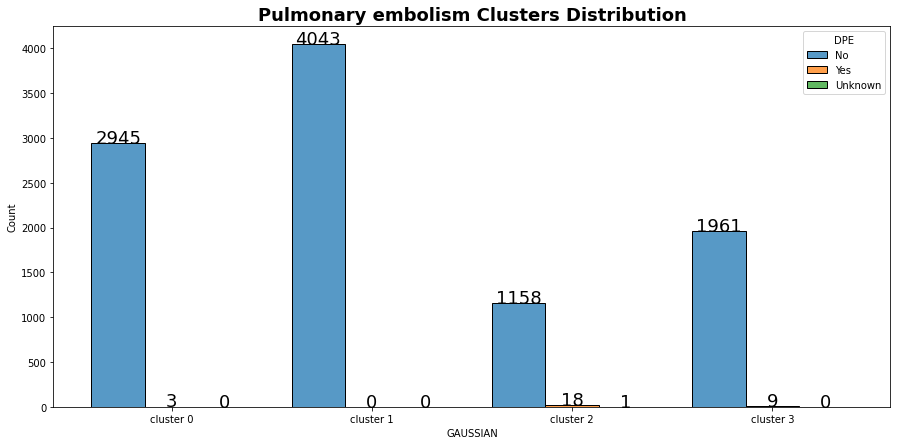

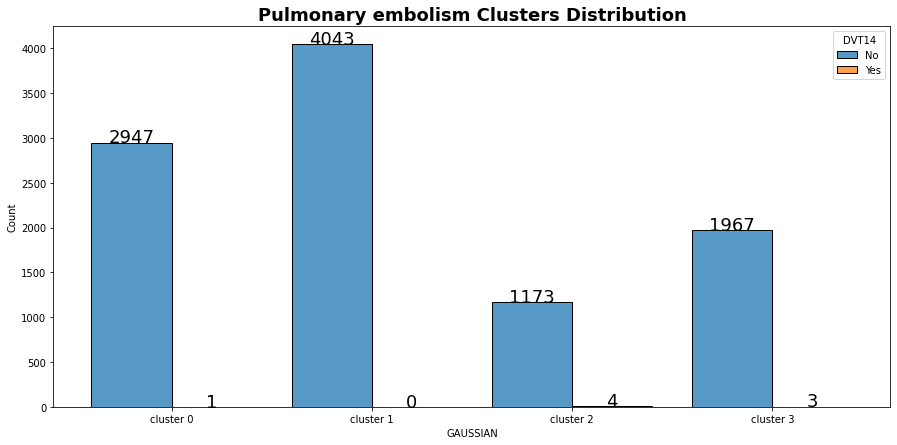

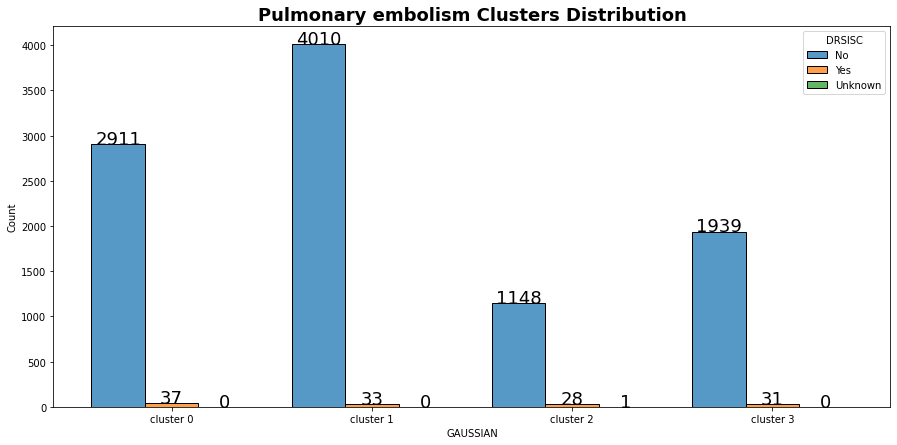

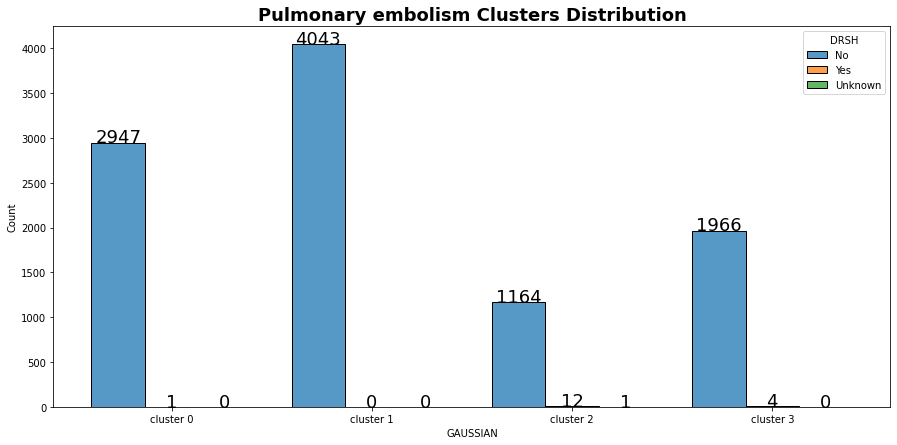

In [53]:
k = 0

for i in Events:
    countplt, ax = plt.subplots(figsize = (15,7))
    ax = sns.histplot(data=data, x="GAUSSIAN", multiple="dodge", hue=i, shrink=.8)
    ax.set_title(Events_name[k] + ' Clusters Distribution',fontsize = 18, fontweight='bold' )
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 18)

In [54]:
# Iterate over each column name
for column_name in Events:
    print(f"Processing variable: {column_name}")

    # Get the unique values in the current column
    column_values = data[column_name].unique()

    # Iterate over each value in the column
    for value in column_values:
        # Count the total number of instances of the current value in the entire dataset
        total_count = len(data[data[column_name] == value])

        # Count the number of instances of the current value in the current cluster
        count_in_cluster = len(data[(data[column_name] == value) & (data['GAUSSIAN'] == cluster)])

        # Calculate the percentage
        percentage = (count_in_cluster / total_count) * 100

        # Print the percentage for the current value and cluster
        print(f"The percentage of '{value}' in cluster {cluster} compared to all '{value}' in the dataset: {percentage:.2f}%")

Processing variable: DPE
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.14%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 10.00%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 0.00%
Processing variable: DVT14
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.09%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 12.50%
Processing variable: DRSISC
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.09%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the dataset: 28.68%
The percentage of 'Unknown' in cluster cluster 0 compared to all 'Unknown' in the dataset: 0.00%
Processing variable: DRSH
The percentage of 'No' in cluster cluster 0 compared to all 'No' in the dataset: 29.12%
The percentage of 'Yes' in cluster cluster 0 compared to all 'Yes' in the data

# <p style="background-color:#101820ff;font-family:newtimeroman;color:#f2fa4cff;font-size:150%;text-align:center;border-radius:10px 10px;">Data Classification</p>

* Convert categorical values to numerical
* Declare Feature Vector and Target Variable
* Handling Imbalanced data using SMOTE Technique
* Train Test Split
* Building Classifier Models
* Training
* Measurement
* Predicting

In [55]:
clustered_data = pd.read_csv('dataset/Clustered_GM.csv')

In [56]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10138 entries, 0 to 10137
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AGE       10138 non-null  int64 
 1   SEX       10138 non-null  object
 2   RCONSC    10138 non-null  object
 3   RSBP      10138 non-null  int64 
 4   RVISINF   10138 non-null  object
 5   RDEF1     10138 non-null  object
 6   RDEF2     10138 non-null  object
 7   RDEF3     10138 non-null  object
 8   RDEF4     10138 non-null  object
 9   RDEF5     10138 non-null  object
 10  RDEF6     10138 non-null  object
 11  RDEF7     10138 non-null  object
 12  RDEF8     10138 non-null  object
 13  DDIAGISC  10138 non-null  object
 14  DDIAGHA   10138 non-null  object
 15  STYPE     10138 non-null  object
 16  DPE       10138 non-null  object
 17  DVT14     10138 non-null  object
 18  DRSISC    10138 non-null  object
 19  DRSH      10138 non-null  object
 20  DASP14    10138 non-null  object
 21  DOAC      10

In [57]:
clustered_data.head()

,AGE,SEX,RCONSC,RSBP,RVISINF,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,...,DASPLT,FPLACE,DHAEMD,DCAREND,DTHROMB,OCCODE,DALIVE,CMPLASP,CMPLHEP,GAUSSIAN
0,71,F,Fully_Alert,170,No,Yes,Yes,Yes,No,No,...,Yes,Home,No,No,No,Dependent,Yes,Yes,Yes,1
1,81,M,Fully_Alert,170,No,No,No,No,Yes,No,...,Yes,Home,No,No,No,Fully_Recovered,Yes,Yes,Yes,0
2,54,M,Fully_Alert,135,No,Yes,Yes,Yes,No,No,...,Yes,Home,No,No,No,Not_recovered,Yes,Yes,Yes,1
3,23,M,Fully_Alert,120,No,No,No,No,No,No,...,No,Home,No,No,No,Not_recovered,Yes,Yes,Yes,0
4,47,M,Fully_Alert,150,No,No,No,No,No,No,...,Yes,Home,No,No,No,Not_recovered,Yes,Yes,Yes,0


In [58]:
#Get list of categorical variables
s = (clustered_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['SEX', 'RCONSC', 'RVISINF', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'DDIAGISC', 'DDIAGHA', 'STYPE', 'DPE', 'DVT14', 'DRSISC', 'DRSH', 'DASP14', 'DOAC', 'DGORM', 'DMH14', 'RHEP24', 'RASP3', 'FAP', 'FOAC', 'DASPLT', 'FPLACE', 'DHAEMD', 'DCAREND', 'DTHROMB', 'OCCODE', 'DALIVE', 'CMPLASP', 'CMPLHEP']


In [59]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    clustered_data[i]=clustered_data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [60]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10138 entries, 0 to 10137
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   AGE       10138 non-null  int64
 1   SEX       10138 non-null  int32
 2   RCONSC    10138 non-null  int32
 3   RSBP      10138 non-null  int64
 4   RVISINF   10138 non-null  int32
 5   RDEF1     10138 non-null  int32
 6   RDEF2     10138 non-null  int32
 7   RDEF3     10138 non-null  int32
 8   RDEF4     10138 non-null  int32
 9   RDEF5     10138 non-null  int32
 10  RDEF6     10138 non-null  int32
 11  RDEF7     10138 non-null  int32
 12  RDEF8     10138 non-null  int32
 13  DDIAGISC  10138 non-null  int32
 14  DDIAGHA   10138 non-null  int32
 15  STYPE     10138 non-null  int32
 16  DPE       10138 non-null  int32
 17  DVT14     10138 non-null  int32
 18  DRSISC    10138 non-null  int32
 19  DRSH      10138 non-null  int32
 20  DASP14    10138 non-null  int32
 21  DOAC      10138 non-null  int32
 22

In [62]:
X = clustered_data.drop(columns = ['GAUSSIAN'])
y = clustered_data['GAUSSIAN']

### Handling Imbalanced data using SMOTE Technique

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
\nTarget Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(10138, 37)
Shape of X after SMOTE:(16172, 37) 


Target Class distributuion before SMOTE:
1    0.398797
0    0.290787
3    0.194318
2    0.116098
Name: GAUSSIAN, dtype: float64

Target Class distributuion after SMOTE :
1    0.25
0    0.25
3    0.25
2    0.25
Name: GAUSSIAN, dtype: float64


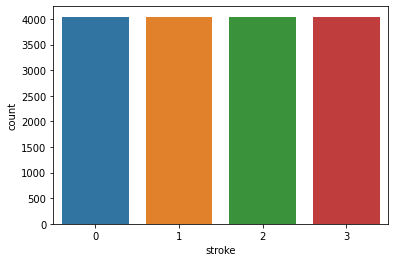

In [65]:
frame = pd.DataFrame({'stroke':y_sm})
ax = sns.countplot(x="stroke", data=frame)

## Train Test Split

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [67]:
# Split Data into Testing (20%) and Training (80%)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = .2, random_state = 42, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12937, 37), (12937,), (3235, 37), (3235,))

In [68]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Building Classifier Models

In [69]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier().fit(X_train, y_train)

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error

In [72]:
# Random Forest
RF_pred = RF.predict(X_test)
RF_acc = RF.score(X_test, y_test)

Random Forest accuracy score is: 0.9499227202472952


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       815
           1       0.96      0.96      0.96       829
           2       0.97      0.94      0.96       786
           3       0.91      0.93      0.92       805

    accuracy                           0.95      3235
   macro avg       0.95      0.95      0.95      3235
weighted avg       0.95      0.95      0.95      3235



<AxesSubplot: >

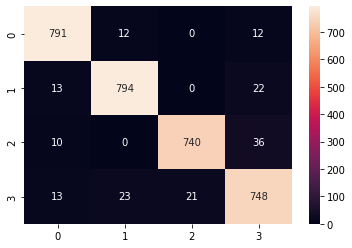

In [73]:
print("Random Forest accuracy score is:",RF_acc)
print("\n")

report = classification_report(y_test, RF_pred)
print(report)

cm = confusion_matrix(y_test, RF_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [74]:
# Mean Absolute Error
print(mean_absolute_error(y_test, RF_pred))

0.08253477588871716


In [75]:
# ANN
ANN_pred = ANN.predict(X_test)
ANN_acc = ANN.score(X_test, y_test)

Artificial Neural Net accuracy score is: 0.9536321483771252


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       815
           1       0.96      0.97      0.97       829
           2       0.96      0.96      0.96       786
           3       0.92      0.93      0.92       805

    accuracy                           0.95      3235
   macro avg       0.95      0.95      0.95      3235
weighted avg       0.95      0.95      0.95      3235



<AxesSubplot: >

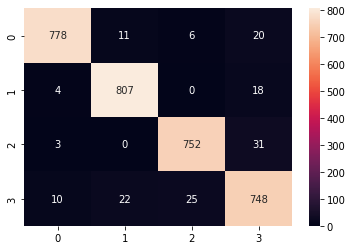

In [76]:
print("Artificial Neural Net accuracy score is:",ANN_acc)
print("\n")

report = classification_report(y_test, ANN_pred)
print(report)

cm = confusion_matrix(y_test, ANN_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [77]:
# Mean Absolute Error
print(mean_absolute_error(y_test, ANN_pred))

0.08006182380216384
